# The _pandas_ package - solutions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import getcwd
%matplotlib inline

pd.set_option('notebook_repr_html', True)

## Exercise 1

### Table, height and friends

<img src="diamond side view.jpg" alt="diamond side view" style="width: 400px;"/>

### Clarity

<img src="diamond clarity chart.png" alt="diamond clarity chart" style="width: 700px;"/>

### Color

<img src="diamond color chart.png" alt="diamond color chart" style="width: 700px;"/>

In [2]:
diamonds = pd.read_csv(getcwd() + "\\diamonds.csv",
                       index_col='#')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
#,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Part 1

#### Question a

In [3]:
diamonds.groupby('color')['price'].max()['E']

18731

#### Question b

In [4]:
diamonds['clarity'].value_counts()['VS1']

8171

#### Question c

In [5]:
diamonds.ix[diamonds.cut == 'Ideal']['price'].mean()

3457.541970210199

#### Question d

In [6]:
for col in ['cut', 'color', 'clarity']:
    n = diamonds[col].nunique()
    print "There are {} types of {}".format(n, col)

There are 5 types of cut
There are 7 types of color
There are 8 types of clarity


#### Question e

In [7]:
pd.pivot_table(diamonds, index='cut', columns='clarity',
               values='price', aggfunc='mean')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,3703.533333,1912.333333,4208.279412,5173.916309,4165.141176,4174.724138,3871.352941,3349.768116
Good,3596.635417,4098.323944,3689.533333,4580.260870,3801.445988,4262.236196,2254.774194,3079.108392
Ideal,4335.726027,2272.913366,3752.118169,4755.952656,3489.744497,3284.550385,2468.129458,3250.290100
Premium,3947.331707,3856.143478,4455.269371,5545.936928,4485.462041,4550.331248,2831.206169,3795.122989
Very Good,4078.226190,4396.216418,3932.391049,4988.688095,3805.353239,4215.759552,2459.441065,3037.765182


### Part 2

#### Question a

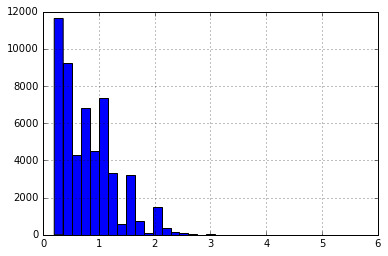

In [8]:
diamonds['carat'].hist(bins=30)

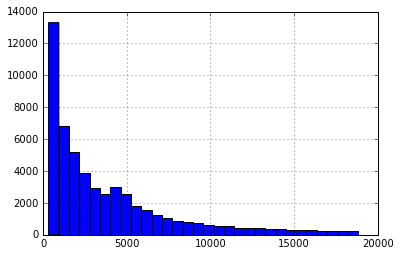

In [9]:
diamonds['price'].hist(bins=30)

#### Question b

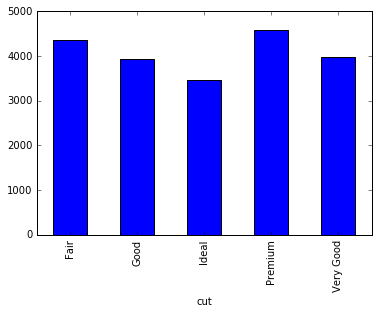

In [10]:
diamonds.groupby('cut')['price'].mean().plot(kind='bar')

#### Question c

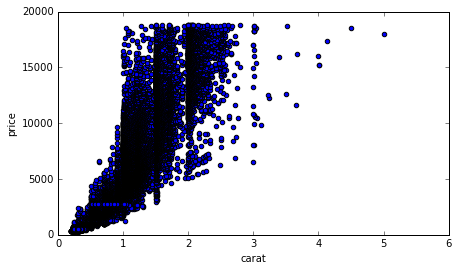

In [11]:
diamonds.plot('carat', 'price', kind='scatter',
              xlim=(0, 6), ylim=(0, 20000), figsize=(7, 4))

#### Question d

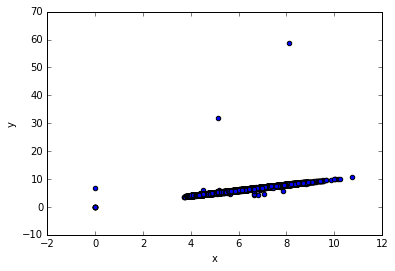

In [12]:
diamonds.plot('x', 'y', kind='scatter')

#### Question e

C:\Users\Amit Rappel\Anaconda2\lib\site-packages\pandas\core\indexing.py:83: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


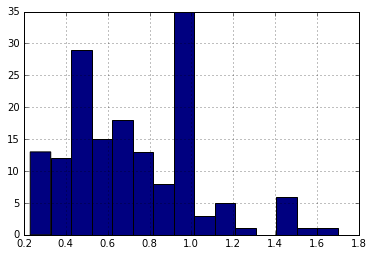

In [13]:
per_ccc = diamonds.set_index(['cut', 'clarity', 'color'])
# per_ccc.sort_index()
per_ccc.ix[('Good', 'VS2', 'E'), 'carat'].hist(bins=15, color='navy')